# Задание

- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
- Разделите данные на выборку для обучения и тестирования
- Постройте модель LDA
- Визуализируйте предсказания для тестовой выборки и центры классов
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

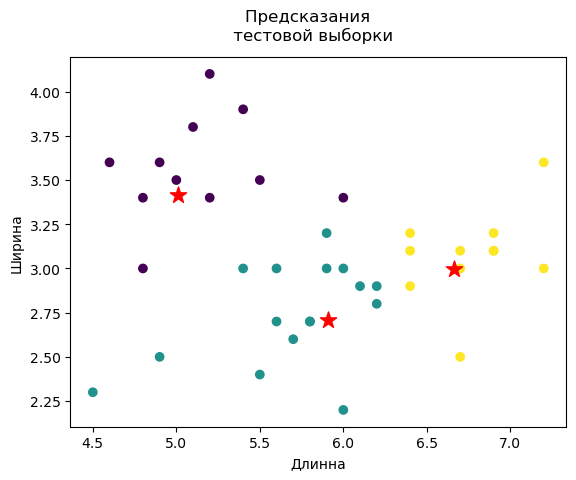

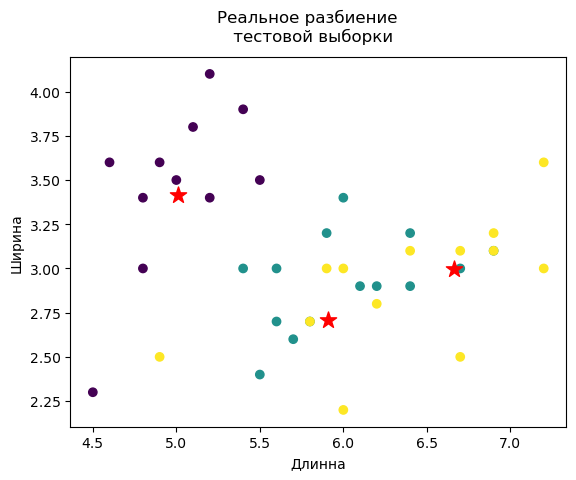

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


data = load_iris(as_frame=True).frame
data = data[['sepal length (cm)', 'sepal width (cm)', 'target']]
data.columns = ['sepal_length', 'sepal_width', 'variety']

X_train, X_test, y_train, y_test = train_test_split(data[['sepal_length', 'sepal_width']], data['variety'], random_state=7)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

result = pd.DataFrame([list(y_test), lda.predict(X_test)]).T
result.columns = ['variety', 'predict']


plt.suptitle('Предсказания \n тестовой выборки')
plt.xlabel('Длинна')
plt.ylabel('Ширина')
plt.scatter(x=X_test['sepal_length'], y=X_test['sepal_width'], c=result['predict'])
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

plt.suptitle('Реальное разбиение \n тестовой выборки')
plt.xlabel('Длинна')
plt.ylabel('Ширина')
plt.scatter(x=X_test['sepal_length'], y=X_test['sepal_width'], c=result['variety'])
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

# print('Видим отличие тестовых данных от предсказаний там, где нет четкой границы между классами')

Нормализаванные данные


C:\Users\turbina\AppData\Local\Temp\ipykernel_2472\1192596289.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaler['sepal_length'] = scaler.fit_transform(np.array(data_clust['sepal_length']).reshape(-1, 1))
C:\Users\turbina\AppData\Local\Temp\ipykernel_2472\1192596289.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaler['sepal_width'] = scaler.fit_transform(np.array(data_clust['sepal_width']).reshape(-1, 1))


,sepal_length,sepal_width
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201
...,...,...
145,1.038005,-0.131979
146,0.553333,-1.282963
147,0.795669,-0.131979
148,0.432165,0.788808


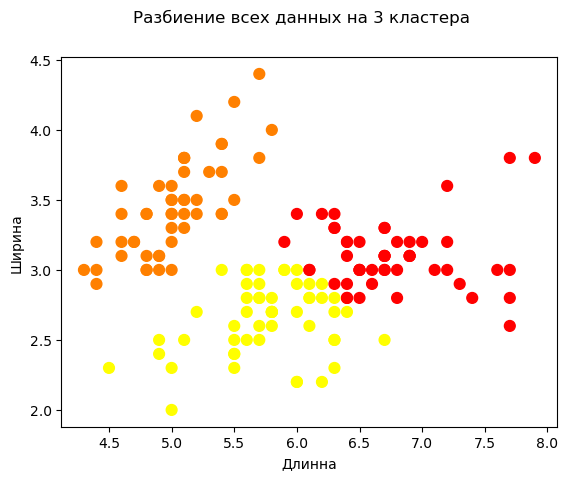

C:\Home\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


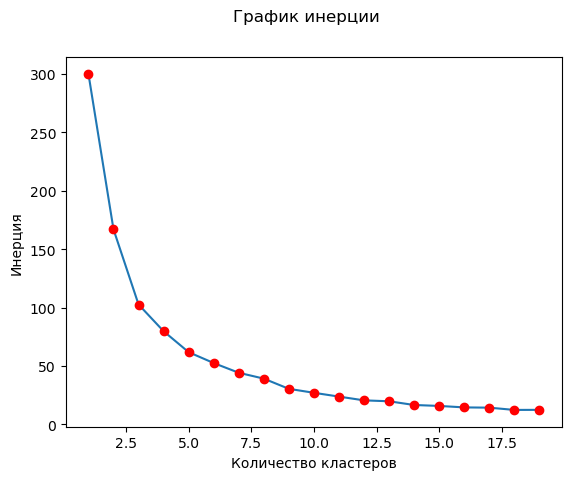

По графику инегции видим, что оптимальное кол-во класторов 2-3. В исходных данных предлагалось так же разбивать на 3 класса


In [161]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# приведем данные к единому масштабу
scaler = StandardScaler()

data_clust = data[['sepal_length', 'sepal_width']]

data_scaler['sepal_length'] = scaler.fit_transform(np.array(data_clust['sepal_length']).reshape(-1, 1))
data_scaler['sepal_width'] = b(np.array(data_clust['sepal_width']).reshape(-1, 1))

print('Нормализаванные данные')
display(data_scaler)

# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_scaler)

plt.suptitle('Разбиение всех данных на 3 кластера')
plt.xlabel('Длинна')
plt.ylabel('Ширина')
# Для отображения точек используем не нормализованные данные, а реальные. Нормализованные нужны только для 
# расчета рассояния при обучении можели кластеризации
plt.scatter(x=data_clust['sepal_length'], y=data_clust['sepal_width'], c=clusters, cmap='autumn', s=60)
plt.show()

k_inertia = []
ks = range(1, 20)

for k in ks:
    k_kmeans = KMeans(n_clusters=k)
    k_kmeans.fit(data_scaler)
    k_inertia.append(k_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.suptitle('График инерции')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

plt.show()

print('По графику инегции видим, что оптимальное кол-во класторов 2-3. В исходных данных предлагалось так же разбивать на 3 класса')